<a href="https://colab.research.google.com/github/naman8827/Project/blob/master/LSTM_Prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np 
import pandas as pd

sentences = []
s1 = 'this is sentence 1'
s2 = 'this is sentence 2'

sentences.append(s1)
sentences.append(s2)

def get_all_words(sentences) : 

  unf = [s.split(' ') for s in sentences]

  all_words = []

  for f in unf : 
    for f2 in f : 
      all_words.append(f2)

  return all_words


all_words = get_all_words(sentences)
print(all_words)

['this', 'is', 'sentence', '1', 'this', 'is', 'sentence', '2']


In [0]:
def get_one_hot(s , s1 , all_words) : 
  flattened = []
  one_hot_encoded_df = pd.get_dummies(list(set(all_words)))
  print(one_hot_encoded_df)
  print(np.array(one_hot_encoded_df['this']))
  for a in [np.array(one_hot_encoded_df[s]) for s in s1.split(' ')] : 
    for aa in a : 
      flattened.append(aa)

  
get_one_hot(sentences , s1 , all_words)
get_one_hot(sentences , s2 , all_words)



   1  2  is  sentence  this
0  0  1   0         0     0
1  0  0   0         1     0
2  1  0   0         0     0
3  0  0   1         0     0
4  0  0   0         0     1
[0 0 0 0 1]
   1  2  is  sentence  this
0  0  1   0         0     0
1  0  0   0         1     0
2  1  0   0         0     0
3  0  0   1         0     0
4  0  0   0         0     1
[0 0 0 0 1]


In [0]:
from keras.preprocessing.text import Tokenizer

def vocab_creater(text_lists, VOCAB_SIZE):

  tokenizer = Tokenizer(num_words=VOCAB_SIZE)
  tokenizer.fit_on_texts(text_lists)
  dictionary = tokenizer.word_index
  
  word2idx = {}
  idx2word = {}
  for k, v in dictionary.items():
      if v < VOCAB_SIZE:
          word2idx[k] = v
          idx2word[v] = k
      if v >= VOCAB_SIZE-1:
          continue
          
  return word2idx, idx2word

encoder_input_text='this is a pen'
word2idx, idx2word = vocab_creater(text_lists=encoder_input_text, VOCAB_SIZE=14999)
print(word2idx, idx2word)

{'i': 1, 's': 2, 't': 3, 'h': 4, 'a': 5, 'p': 6, 'e': 7, 'n': 8} {1: 'i', 2: 's', 3: 't', 4: 'h', 5: 'a', 6: 'p', 7: 'e', 8: 'n'}


In [0]:
def seq2seq_model_builder(HIDDEN_DIM=300):
    
    encoder_inputs = Input(shape=(MAX_LEN, ), dtype='int32',)
    encoder_embedding = embed_layer(encoder_inputs)
    encoder_LSTM = LSTM(HIDDEN_DIM, return_state=True)
    encoder_outputs, state_h, state_c = encoder_LSTM(encoder_embedding)
    
    decoder_inputs = Input(shape=(MAX_LEN, ), dtype='int32',)
    decoder_embedding = embed_layer(decoder_inputs)
    decoder_LSTM = LSTM(HIDDEN_DIM, return_state=True, return_sequences=True)
    decoder_outputs, _, _ = decoder_LSTM(decoder_embedding, initial_state=[state_h, state_c])
    
    # dense_layer = Dense(VOCAB_SIZE, activation='softmax')
    outputs = TimeDistributed(Dense(VOCAB_SIZE, activation='softmax'))(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], outputs)
    
    return model
MAX_LEN=10   
model = seq2seq_model_builder(HIDDEN_DIM=300)
model.summary()    

RuntimeError: ignored

In [0]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# define contrived series
data = [10.1, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
series = Series(data)
#print (series)
# prepare data for normalization
values = series.values
print(values)
values = values.reshape((len (values), 1))
print(values)
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print ( 'Min : %f, Max : %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print
normalized = scaler.transform(values)
print (normalized)
# inverse transform and print
inversed = scaler.inverse_transform(normalized)
#print (inversed)

[ 10.1  20.   30.   40.   50.   60.   70.   80.   90.  100. ]
[[ 10.1]
 [ 20. ]
 [ 30. ]
 [ 40. ]
 [ 50. ]
 [ 60. ]
 [ 70. ]
 [ 80. ]
 [ 90. ]
 [100. ]]
Min : 10.100000, Max : 100.000000
[[0.        ]
 [0.11012236]
 [0.22135706]
 [0.33259177]
 [0.44382647]
 [0.55506118]
 [0.66629588]
 [0.77753059]
 [0.88876529]
 [1.        ]]


In [0]:
model = Sequential()
model.add(LSTM(5, input_shape=(2,1)))
model.add(Dense(1))
model.add(Activation( sigmoid ))

NameError: ignored

In [0]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((1, 5, 2))
print(data)

[[[0.1 0.2]
  [0.3 0.4]
  [0.5 0.6]
  [0.7 0.8]
  [0.9 1. ]]]


In [0]:
import random
def generate_sequence(length, n_features):
 return [random.randint(0, n_features-1) for _ in range (length)]
p=generate_sequence(10,5)
print(p)
 

[4, 2, 2, 2, 3, 0, 0, 3, 2, 2]


In [0]:
# one hot encode sequence
from numpy import array
import pandas
def one_hot_encode(sequence, n_features):
 encoding = list()
 for value in sequence:
  vector = [0 for _ in range (n_features)]
  vector[value] = 1
  encoding.append(vector)
 return array(encoding)
print(p) 
Y=one_hot_encode(p, 5) 
print(Y)

[4, 2, 2, 2, 3, 0, 0, 3, 2, 2]
[[0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [0]:
from numpy import array
X = Y.reshape(1, 25, 2)
print(X)

[[[0 0]
  [0 0]
  [1 0]
  [0 1]
  [0 0]
  [0 0]
  [1 0]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 1]
  [0 1]
  [0 0]
  [0 0]
  [1 0]
  [0 0]
  [0 0]
  [0 0]
  [1 0]
  [0 0]
  [1 0]
  [0 0]
  [0 1]
  [0 0]]]


In [0]:
# define model
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Activation
out_index = 2
model = Sequential()
model.add(LSTM(25, input_shape=(length, n_features)))
model.add(Dense(n_features, activation= 'softmax' ))
model.compile (loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'acc' ])
print (model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 25)                3600      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#final
from random import randint
from numpy import array
from numpy import argmax
import pandas
# generate a sequence of random numbers in [0, n_features)
def generate_sequence(length, n_features):
 return [randint(0, n_features-1) for _ in range (length)]
# one hot encode sequence
def one_hot_encode(sequence, n_features):
 encoding = list()
 for value in sequence:
  vector = [0 for _ in range (n_features)]
  vector[value] = 1
  encoding.append(vector)
 return array(encoding)
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
  return [argmax(vector) for vector in encoded_seq]
# generate one example for an lstm
def generate_example(length, n_features, out_index):
# generate sequence
 sequence = generate_sequence(length, n_features)
# one hot encode
 encoded = one_hot_encode(sequence, n_features)
# reshape sequence to be 3D
 X = encoded.reshape((1, length, n_features))
# select output
 y = encoded[out_index].reshape(1, n_features)
 return X, y
 

In [0]:
# fit model
length = 5
n_features = 10
out_index = 2
for i in range (100):
 X, y = generate_example(length, n_features, out_index)
 model.fit(X, y, epochs=1, verbose=2)

1/1 - 0s - loss: 0.4843 - acc: 1.0000
1/1 - 0s - loss: 1.1865 - acc: 1.0000
1/1 - 0s - loss: 1.4395 - acc: 0.0000e+00
1/1 - 0s - loss: 1.3157 - acc: 0.0000e+00
1/1 - 0s - loss: 0.4448 - acc: 1.0000
1/1 - 0s - loss: 2.0944 - acc: 0.0000e+00
1/1 - 0s - loss: 1.1264 - acc: 1.0000
1/1 - 0s - loss: 1.3204 - acc: 0.0000e+00
1/1 - 0s - loss: 0.0745 - acc: 1.0000
1/1 - 0s - loss: 2.4756 - acc: 0.0000e+00
1/1 - 0s - loss: 0.5454 - acc: 1.0000
1/1 - 0s - loss: 1.9614 - acc: 0.0000e+00
1/1 - 0s - loss: 0.1040 - acc: 1.0000
1/1 - 0s - loss: 1.4820 - acc: 0.0000e+00
1/1 - 0s - loss: 0.7002 - acc: 1.0000
1/1 - 0s - loss: 2.5909 - acc: 0.0000e+00
1/1 - 0s - loss: 1.2996 - acc: 1.0000
1/1 - 0s - loss: 0.2235 - acc: 1.0000
1/1 - 0s - loss: 2.2132 - acc: 0.0000e+00
1/1 - 0s - loss: 0.6803 - acc: 1.0000
1/1 - 0s - loss: 0.9085 - acc: 1.0000
1/1 - 0s - loss: 0.7533 - acc: 1.0000
1/1 - 0s - loss: 0.1798 - acc: 1.0000
1/1 - 0s - loss: 0.4741 - acc: 1.0000
1/1 - 0s - loss: 0.1027 - acc: 1.0000
1/1 - 0s - los

In [0]:
# evaluate model
correct = 0
for i in range (100):
 X, y = generate_example(length, n_features, out_index)
 yhat = model.predict(X)
 if one_hot_decode(yhat) == one_hot_decode(y):
  correct += 1
print ( 'Accuracy: %f' % ((correct/100)*100.0))

Accuracy: 72.000000


In [0]:
X, y = generate_example(length, n_features, out_index)
yhat = model.predict(X)
print ( 'Sequence: %s' % [one_hot_decode(x) for x in X])
print ( 'Expected: %s' % one_hot_decode(y))
print ( 'Predicted : %s' % one_hot_decode(yhat))

ERROR! Session/line number was not unique in database. History logging moved to new session 64
Sequence: [[6, 6, 7, 7, 9]]
Expected: [7]
Predicted : [7]


In [0]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np 
import pandas as pd
from random import randint
from numpy import array
from numpy import argmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Activation
model = Sequential()
model.add(LSTM(1, input_shape=(3,1)))
model.compile (optimizer= 'adam' , loss= 'mse' )
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(data)
# make and show prediction
print (model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]]
[[0.00433646]]


In [0]:
# Example of one output for each input time step
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np 
import pandas as pd
from random import randint
from numpy import array
from numpy import argmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Activation
# define model where LSTM is also output layer
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1)))
model.compile (optimizer= 'adam' , loss= 'mse' )
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(data)
# make and show prediction
print (model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]]
[[[-0.00613188]
  [-0.01569991]
  [-0.02686818]]]


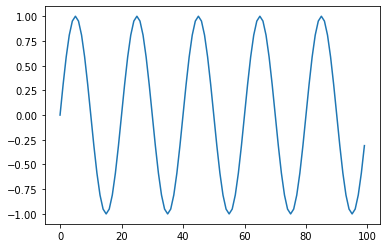

In [0]:
from math import sin
from math import pi
from matplotlib import pyplot
# create sequence
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i/length)) for i in range (length)]
# plot sequence
pyplot.plot(sequence)
pyplot.show()

In [0]:
from random import seed
from random import randint
# generate lists of random integers and their sum
def random_sum_pairs(n_examples, n_numbers, largest):
 X, y = list(), list()
 for i in range (n_examples):
  in_pattern = [randint(1,largest) for _ in range (n_numbers)]
  print(in_pattern)
  out_pattern = sum (in_pattern)
  print(out_pattern)
  X.append(in_pattern)
  y.append(out_pattern)
 return X, y

In [7]:
seed(1)
n_samples = 2
n_numbers = 2
largest = 10
# generate pairs
X, y = random_sum_pairs(n_samples, n_numbers, largest)
print (X, y)

[3, 10]
13
[2, 5]
7
[[3, 10], [2, 5]] [13, 7]
